(4746, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None
    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800      

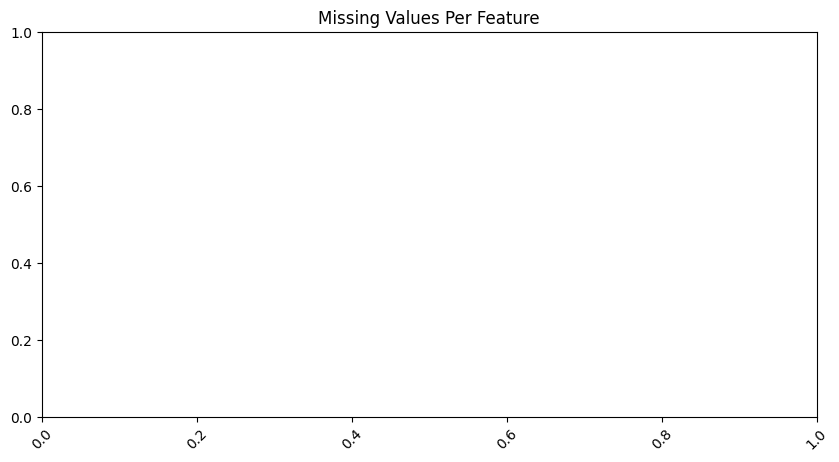


Summary Statistics:
            count          mean           std     min      25%      50%  \
BHK       4746.0      2.083860      0.832256     1.0      2.0      2.0   
Rent      4746.0  34993.451327  78106.412937  1200.0  10000.0  16000.0   
Size      4746.0    967.490729    634.202328    10.0    550.0    850.0   
Bathroom  4746.0      1.965866      0.884532     1.0      1.0      2.0   

              75%        max  
BHK           3.0        6.0  
Rent      33000.0  3500000.0  
Size       1200.0     8000.0  
Bathroom      2.0       10.0  


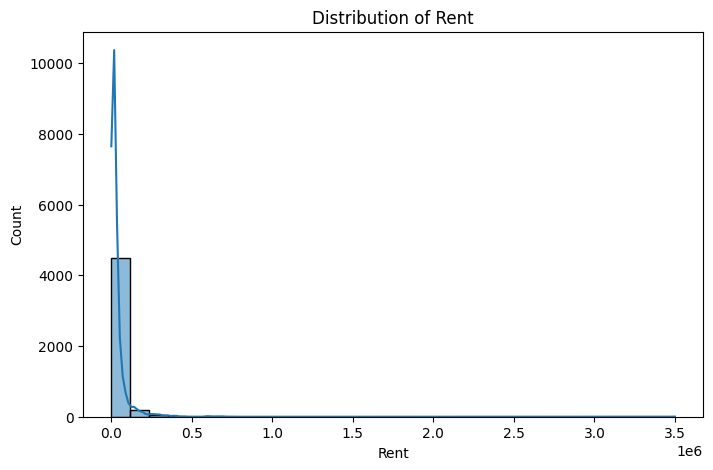

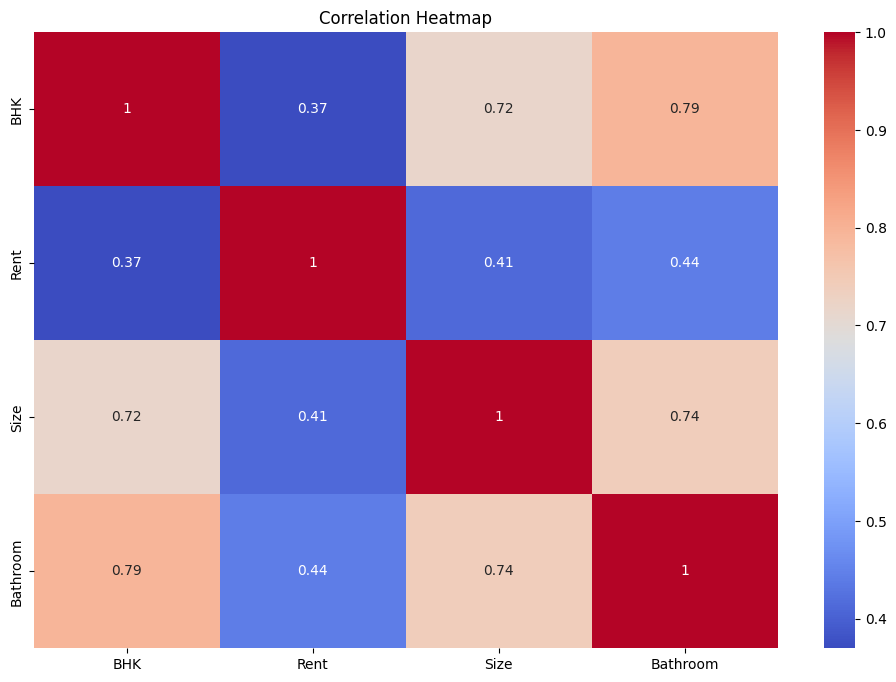

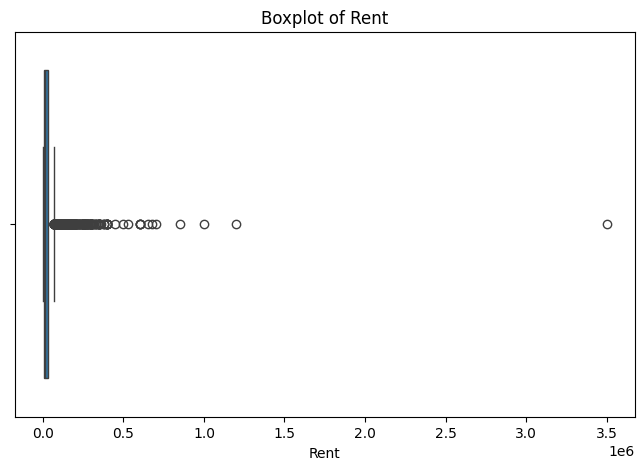

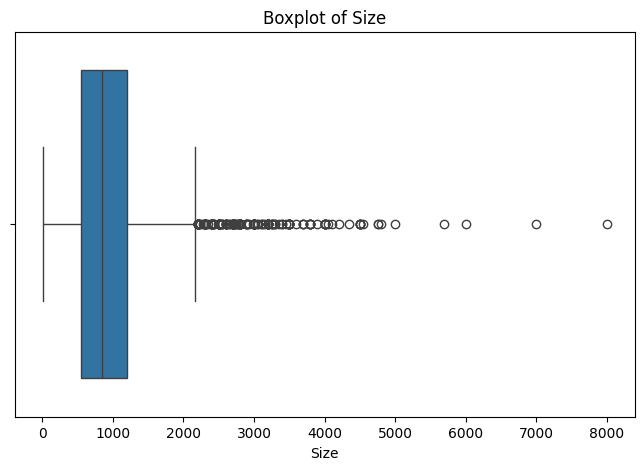

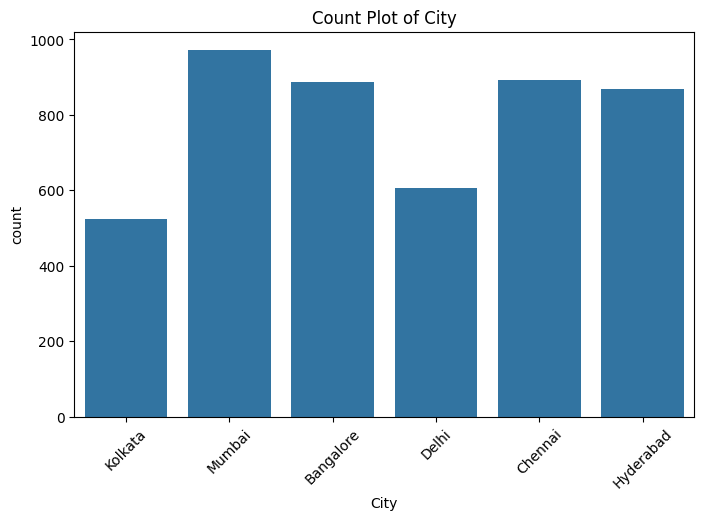

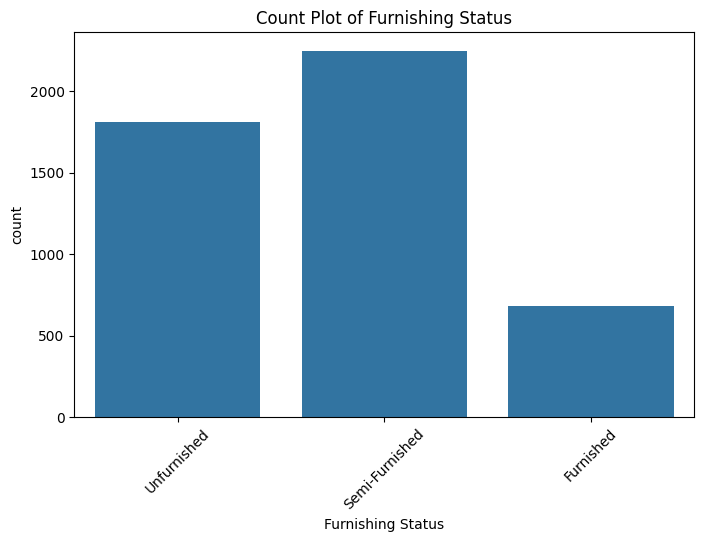

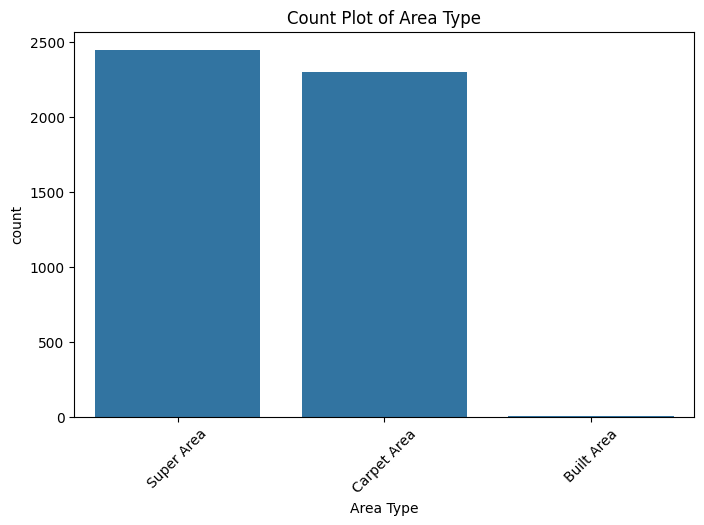

C:\Users\aryan\AppData\Local\Temp\ipykernel_35648\3150181337.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Median for numeric
C:\Users\aryan\AppData\Local\Temp\ipykernel_35648\3150181337.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav


After filling missing values:
 Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


KeyError: "['AreaType'] not in index"

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Load dataset
df = pd.read_csv(r"C:\Users\aryan\Downloads\House_Rent_Dataset.csv")

# Basic info
print(df.shape)
print(df.info())
print(df.head())

# Day 2: Exploratory Data Analysis (EDA)

# Missing values
print("\nMissing Values per column:")
print(df.isnull().sum())

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45)
plt.title("Missing Values Per Feature")
plt.show()

# Summary statistics
print("\nSummary Statistics:\n", df.describe().T)

# Target distribution
target = "Rent"
plt.figure(figsize=(8,5))
sns.histplot(df[target], kde=True, bins=30)
plt.title(f"Distribution of {target}")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for numeric features
num_features = ["Rent", "Size"]

for col in num_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])   # use the column dynamically
    plt.title(f"Boxplot of {col}")
    plt.show()


# Countplots for categorical features (BEFORE encoding)
cat_features = ["City", "Furnishing Status", "Area Type"]

for col in cat_features:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df)   # cleaner way
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Day 3: Data Cleaning & Encoding

# Step 1: Fill missing values
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)  # Median for numeric

cat_cols = df.select_dtypes(include='object').columns.tolist()
for cat in cat_cols:
    df[cat].fillna(df[cat].mode()[0], inplace=True)  # Mode for categorical

print("\nAfter filling missing values:\n", df.isnull().sum())

# Step 2: Encode categorical features
categorical_features = ["City", "AreaType", "Furnishing Status"]
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("\nAfter encoding:")
print(df.head())

# Step 3: Feature Transformation (Target variable)
df["Rent"] = np.log1p(df["Rent"])  # Log-transform target

# Step 4: Feature Scaling
numeric_features = ["Size", "BHK", "Floor"]  # Make sure these exist in your dataset
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nAfter scaling numerical features:")
print(df[numeric_features].head())

# Step 5: Save Processed Data
df.to_csv("processed_data.csv", index=False)
print("\nProcessed dataset saved as processed_data.csv")

#Day4 Model Building

#Defining target and features
x = df["Rent"]
y = df.drop(columns=["Rent" , "Rent_log"],errors="ignore")

# Split train/test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_split=42)

# Model 1: Linear Regression 
lr = LinearRegression() 
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model 2: Decision Tree 
dt = DecisionTreeRegressor(random_state=42) 
dt.fit(X_train, y_train) 
y_pred_dt = dt.predict(X_test)

# Model 3: Random Forest 
rf = RandomForestRegressor(random_state=42, n_estimators=100) 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, model_name): 
    r2 = r2_score(y_true, y_pred) 
    mae = mean_absolute_error(y_true, y_pred) 
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n{model_name} Performance:")
    print(f"R²: {r2:.4f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}") 
    return r2, mae, rmse
    
    evaluate_model(y_test, y_pred_lr, "Linear Regression")
    evaluate_model(y_test, y_pred_dt, "Decision Tree") 
    evaluate_model(y_test, y_pred_rf, "Random Forest")
    
    print("\nDay 4 complete: Models trained and evaluated!")

#Day5

#Linear Regression (cv only)
lr = LinearRegression() 
cv_scores_lr = cross_val_score(lr, X, y, cv=5, scoring="r2")
print("\nLinear Regression CV R²:", cv_scores_lr)
print("Average R²:", cv_scores_lr.mean())

#Decsion Tree9gridSearchCV)
dt_param_grid = {
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4] 
}

dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_param_grid,
    cv=5, scoring="r2",
    n_jobs=-1,
    verbose=2 
)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_ 
print("\nBest Decision Tree Params:", dt_grid.best_params_)

#Evaluate
y_pred_dt = best_dt.predict(X_test) 
print("\nDecision Tree Tuned Performance:") 
print(f"R²: {r2_score(y_test, y_pred_dt):.4f} | MAE: {mean_absolute_error(y_test, y_pred_dt):.2f} | RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.2f}") 

joblib.dump(best_dt, "best_decision_tree_model.pkl")

#RandomForest(GridSearchCV)
rf_param_grid = { 
    "n_estimators": [100, 200], 
    "max_depth": [10, 20, None], 
    "min_samples_split": [2, 5, 10] 
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42), 
    param_grid=rf_param_grid, 
    cv=5, 
    scoring="r2",
    n_jobs=-1, 
    verbose=2 
)

rf_grid.fit(X_train, y_train) 
best_rf = rf_grid.best_estimator_ 
print("\nBest Random Forest Params:", rf_grid.best_params_) 

# Evaluate 
y_pred_rf = best_rf.predict(X_test) 
print("\nRandom Forest Tuned Performance:")
print(f"R²: {r2_score(y_test, y_pred_rf):.4f} | MAE: {mean_absolute_error(y_test, y_pred_rf):.2f} | RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}") 

joblib.dump(best_rf, "best_random_forest_model.pkl")

print("\n📌 Day 5 Summary") 
print("- Linear Regression CV Avg R²:", cv_scores_lr.mean()) 
print("- Decision Tree Best R²:", r2_score(y_test, y_pred_dt)) 
print("- Random Forest Best R²:", r2_score(y_test, y_pred_rf)) 
print("\n✅ Day 5 complete: Models tuned, cross-validated, and saved!")
